# Guide for twinpy/analysis/phonon_analyzer.py

In [1]:
%aiida
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pprint import pprint
import numpy as np
import twinpy
from twinpy.interfaces.aiida import (get_cell_from_aiida,
                                     AiidaRelaxWorkChain,
                                     AiidaPhonopyWorkChain,
                                     )
from twinpy.analysis.phonon_analyzer import PhononAnalyzer
from twinpy.plot.band_structure import (get_labels_band_paths_from_seekpath,
                                        BandPlot)

jupyter_dir = os.path.join(os.path.dirname(twinpy.__file__), '..', 'jupyter')
sys.path.append(os.path.join(jupyter_dir, 'site-packages'))
from jupyter_help import show_info

orig_structure_pk = 315869  # twinpy Ti_pv shear_orig_003
relax_pk = 316006  # twinpy Ti_pv shear_003 relax
phonopy_pk = 318866  # twinpy Ti_pv shear_003 phonon

# class PhononAnalyzer

In [3]:
aiida_phonopy = AiidaPhonopyWorkChain(load_node(phonopy_pk))
aiida_relax = AiidaRelaxWorkChain(load_node(relax_pk))
original_cell = get_cell_from_aiida(load_node(orig_structure_pk))
relax_analyzer = aiida_relax.get_relax_analyzer(original_cell=original_cell)
phonon_analyzer = aiida_phonopy.get_phonon_analyzer(relax_analyzer=relax_analyzer)
show_info(PhononAnalyzer, is_class=True)

====== START class information ======

# ---------
# docstring
# ---------

    Analize phonopy result.
    

# ----
# init
# ----

        Args:
            phonon: Phonopy class object.
        

# ---------------
# attribute names
# ---------------
['__module__',
 '__doc__',
 '__init__',
 '_set_primitive_cell',
 'primitive_cell',
 '_set_reciprocal_lattice',
 'reciprocal_lattice',
 'original_reciprocal_lattice',
 'phonon',
 'relax_analyzer',
 'set_relax_analyzer',
 'rotation_matrix',
 'export_phonon',
 'get_qpoints_from_original_to_primitive',
 'get_qpoints_from_primitive_to_original',
 'get_band_paths_from_original_to_primitive',
 'get_band_paths_from_primitive_to_original',
 'get_band_structure',
 'run_mesh',
 'get_thermal_displacement_matrices',
 '__dict__',
 '__weakref__']

# ------
# values
# ------
mappingproxy({'__dict__': <attribute '__dict__' of 'PhononAnalyzer' objects>,
              '__doc__': '\n    Analize phonopy result.\n    ',
              '__init__': <function Phon

## def set_relax_analyzer

In [4]:
show_info(phonon_analyzer.set_relax_analyzer)
print("# You can set relax_analyzer object "
      "with this function.")

====== START method information ======

# ---------
# docstring
# ---------

        Set relax analyzer.

        Args:
            relax_analyzer: RelaxAnalyzer class object.
        

======= END method information =======


# You can set relax_analyzer object with this function.


## def export_phonon

In [5]:
show_info(phonon_analyzer.export_phonon)
filename = os.path.join(jupyter_dir, 'data', 'phonon', 'Mg_bulk_phonon.yaml')
phonon_analyzer.export_phonon(filename=filename)

====== START method information ======

# ---------
# docstring
# ---------

        Export phonopy object to yaml file.

        Args:
            filename (str): Output filename. If None, filename becomes
                            pk<number>_phonopy.yaml.
        

======= END method information =======




## def get_band_structure

====== START method information ======

# ---------
# docstring
# ---------

        Get BandStructure class object.

        Args:
            band_paths (list): Band paths.
            labels (list): Band labels.
            npoints (int): The number of sampling points.
            with_eigenvectors (bool): If True, calculte eigenvectors.
        

======= END method information =======




(<Figure size 576x432 with 4 Axes>,
  <matplotlib.axes._axes.Axes at 0x7f23e739f810>])

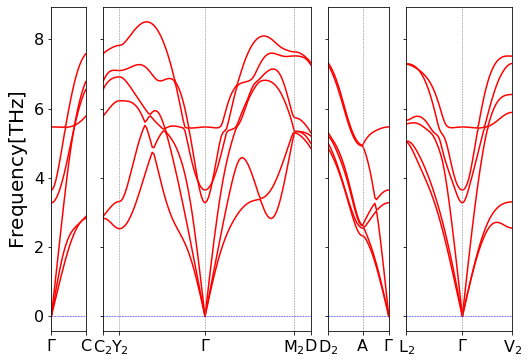

In [6]:
labels, path_paths = get_labels_band_paths_from_seekpath(cell=phonon_analyzer.primitive_cell)
show_info(phonon_analyzer.get_band_structure)
band_structure = phonon_analyzer.get_band_structure(
                     band_paths=path_paths,
                     labels=labels)
bp = BandPlot(band_structure)
bp.plot_band_structure()

## def run_mesh

In [7]:
show_info(phonon_analyzer.run_mesh)
print("# Dry run")
phonon_analyzer.run_mesh(
    interval=0.1,
    dry_run=True)
print("")
phonon_analyzer.run_mesh(
    interval=0.1,
    is_store=True,
    get_phonon=False,
    is_eigenvectors=True,
    dry_run=False)

====== START method information ======

# ---------
# docstring
# ---------

        Run mesh for both hexagonal and twinboundary phonon.

        Args:
            interval (float): mesh interval
            is_store (bool): If True, result is stored in self._phonon.
            get_phonon (bool): If True, return Phonopy class obejct,
                               which is independent from self._phonon.
            dry_run (bool): If True, show sampling mesh information
                            and not run.
        

======= END method information =======


# Dry run
# interval: 0.1
# sampling mesh: [26 26 14]
# dry_run is evoked.

run mesh with [26 26 14]


## def get_thermal_displacement_matrices

In [8]:
show_info(phonon_analyzer.get_thermal_displacement_matrices)
thermal_matrices = phonon_analyzer.get_thermal_displacement_matrices(
                       t_step=100,
                       t_max=1000,
                       t_min=0,
                       with_original_cart=True,
                       def_cif=False,
                       )
print("# shape")
print(thermal_matrices.shape)

====== START method information ======

# ---------
# docstring
# ---------

        Get ThermalDisplacementMatrices object for
        both hexagonal and twinboundary.

        Args:
            t_step (int): temperature interval
            t_max (int): max temperature
            t_min (int): minimum temperature
            with_original_cart (bool): if True, use twinboundary
                                       original frame
            def_cif (bool): if True, use cif definition

        Todo:
            I do not know how to rotate 4d array (temp, atoms, 3, 3).
        

======= END method information =======


# shape
(11, 2, 3, 3)
